## Montage en mode automatique

Dans ce montage, c'est le programme qui déclenche la charge ou la décharge du condensateur en plaçant le pin 3 l'état haut ou à l'état bas au début des mesures.
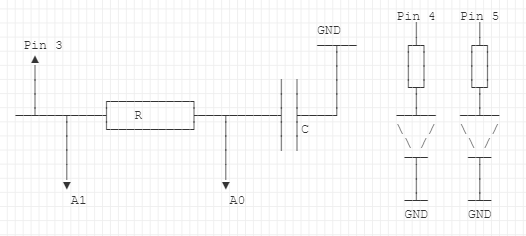

In [4]:
from pduino import *
from juduino import *
print(liste_ports())

['COM1']


In [5]:
# --- condensateur charge auto ---

# modifiez le port en fonction de votre configuration
mon_interface = Interface('COM21', [('t', 's'), ('E', 'V'), ('uc', 'V')], 'temporel')
'''dans le cas d'une charge rapide:
   my_int = Interface('COM21', [('t', 's'), ('E', 'V'), ('uc', 'V')], 'temporel', False)
'''

def action_1():
     # exécuté lorsque l'utilisateur clique sur le bouton 'Charge'
    global t, X, Y
    t, X, Y = mon_interface.mesures_tempo('...', 2)
    
def action_2():
     # exécuté lorsque l'utilisateur clique sur le bouton 'Décharge'
    global t, X, Y
    t, X, Y = mon_interface.mesures_tempo('...', 2)

def sauvegarde():
     # exécuté lorsque l'utilisateur clique sur le bouton 'Sauvegarde'
    fichier = saisie.value + '.csv'
    ecrit_fichier_csv(fichier, t, X, Y)
    print('fichier {} créé'.format(fichier))
    
def affiche():
    n = 90
    if len(t) > 0:
        print(liste_valeurs('t', t, n))
        print(liste_valeurs('X', X, n))
        print(liste_valeurs('Y', Y, n))   
    
# --- programme principal
mon_interface.add_bouton('Action 1', action_1)
mon_interface.add_bouton('Action 2', action_2)
saisie = mon_interface.add_saisie('Nom Fichier', 'mesures')
mon_interface.add_bouton('Sauvegarde', sauvegarde)
mon_interface.add_bouton('Affiche listes', affiche)
mon_interface.affiche()